In this project, I tried to understand how mall customers can be grouped by spending behaviour, age and income; in order to offer better campaigns and offerings. For this, I apply K-Means clustering through finding optimum number of clusters by elbow method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set()

In [2]:
pip install kaggle

In [4]:
# Setup Kaggle API (one-liner)
from google.colab import drive; drive.mount('/content/drive')
!mkdir -p ~/.kaggle && cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# Download and unzip a dataset
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
!unzip customer-segmentation-tutorial-in-python.zip

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 5.66MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [5]:
!ls

customer-segmentation-tutorial-in-python.zip  Mall_Customers.csv
drive					      sample_data


In [28]:
data = pd.read_csv("Mall_Customers.csv")
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
if data.isnull().values.any() == False:
  print("There is no NULL value")
else:
  print("There is NULL value")
  data.dropna()
  print("NULL value has been removed")

There is no NULL value


In [7]:
x = data.iloc[:,[2,4]]
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


Text(0, 0.5, 'WCSS')

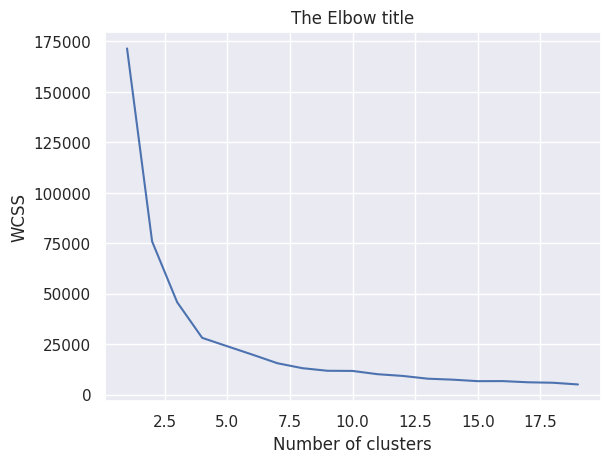

In [8]:
wcss=[]

for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,20)
plt.plot(number_clusters, wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')



In [19]:
kmeans_2 = KMeans(4)
kmeans_2.fit(x)

KMeans(n_clusters=4)

In [20]:
identified_clusters = kmeans_2.fit_predict(x)
identified_clusters

array([3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 3, 2, 0, 3, 0,
       2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 3,
       2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 1, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

Text(0, 0.5, 'Spending Score (1-100)')

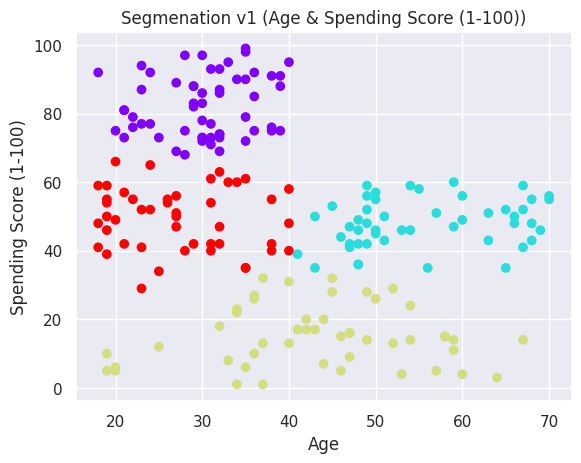

In [21]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Age'], data_with_clusters['Spending Score (1-100)'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.title('Segmenation v1 (Age & Spending Score (1-100))')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

In [22]:
y = data.iloc[:,[3,4]]
y

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'WCSS')

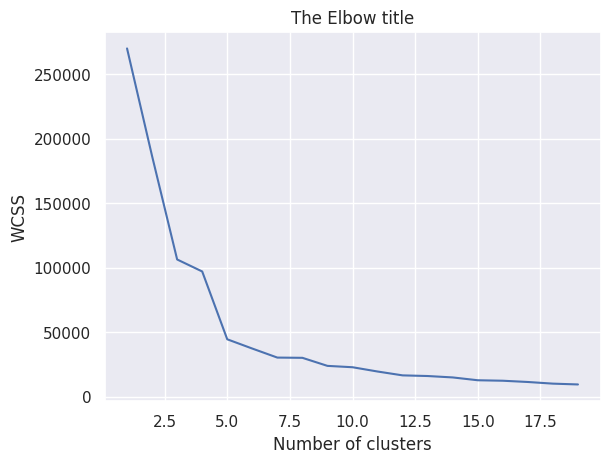

In [23]:
wcss_2=[]

for i in range(1,20):
    kmeans_3 = KMeans(i)
    kmeans_3.fit(y)
    wcss_iter_2 = kmeans_3.inertia_
    wcss_2.append(wcss_iter_2)

number_clusters_2 = range(1,20)
plt.plot(number_clusters_2, wcss_2)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [24]:
kmeans_4 = KMeans(5)
kmeans_4.fit(y)

KMeans(n_clusters=5)

In [25]:
identified_clusters_2 = kmeans_4.fit_predict(y)
identified_clusters_2

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

Text(0, 0.5, 'Spending Score (1-100)')

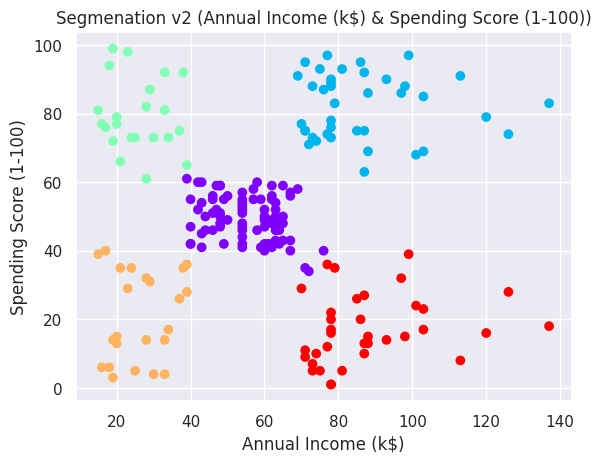

In [26]:
data_with_clusters_2 = data.copy()
data_with_clusters_2['Clusters'] =identified_clusters_2
plt.scatter(data_with_clusters_2['Annual Income (k$)'], data_with_clusters_2['Spending Score (1-100)'], c=data_with_clusters_2['Clusters'], cmap='rainbow')
plt.title('Segmenation v2 (Annual Income (k$) & Spending Score (1-100))')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')